 # TC 生成异常的空间分布  


# 处理数据

In [1]:
pip install dbf

     |████████████████████████████████| 107 kB 114 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas dbfread

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np  
import pandas as pd
import xarray as xr
from dbfread import DBF
import dbf
from scipy.stats import linregress
import matplotlib.pyplot as plt
from matplotlib import rcParams
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.mpl.ticker as cticker
from cartopy.io.shapereader import Reader
import cartopy.io.shapereader as shpreader
import math
from matplotlib import patches
from tqdm import tqdm
import os
import cmaps
from matplotlib.colors import ListedColormap

In [2]:
# 指定两个dbf文件路径
filename1 = "./dataset/SI.dbf"
filename2 = "./dataset/SP.dbf"

In [3]:
# 指定要读取的列名
columns = ['SID', 'year', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME', 'NATURE', 'LAT', 'LON', 'USA_ATCFID', 'DIST2LAND', 'USA_STATUS', 'USA_WIND']

In [4]:
# 读取dbf文件中指定列名的数据
data1 = []
for record in DBF(filename1):
    row = []
    for column in columns:
        row.append(record[column])
    data1.append(row)

data2 = []
for record in DBF(filename2):
    row = []
    for column in columns:
        row.append(record[column])
    data2.append(row)

In [5]:
# 将数据转换为DataFrame
df1 = pd.DataFrame(data1, columns=columns)  #168730row
df2 = pd.DataFrame(data2, columns=columns)  #75937row
df2

,SID,year,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,USA_ATCFID,DIST2LAND,USA_STATUS,USA_WIND
0,1897005S10135,1897,SP,EA,NOT_NAMED,1897-01-04 12:00:00,NR,-10.10,135.30,,226,,NaN
1,1897005S10135,1897,SI,WA,NOT_NAMED,1897-01-04 15:00:00,NR,-10.28,134.90,,201,,NaN
2,1897005S10135,1897,SI,WA,NOT_NAMED,1897-01-04 18:00:00,NR,-10.44,134.52,,174,,NaN
3,1897005S10135,1897,SI,WA,NOT_NAMED,1897-01-04 21:00:00,NR,-10.59,134.18,,141,,NaN
4,1897005S10135,1897,SI,WA,NOT_NAMED,1897-01-05 00:00:00,NR,-10.70,133.90,,123,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75932,2023061S14162,2023,SP,MM,KEVIN,2023-03-06 06:00:00,NR,-30.80,193.00,SP162023,1525,,51.0
75933,2023061S14162,2023,SP,MM,KEVIN,2023-03-06 09:00:00,NR,-31.11,193.95,SP162023,1579,,48.0
75934,2023061S14162,2023,SP,MM,KEVIN,2023-03-06 12:00:00,NR,-31.40,194.70,SP162023,1627,,45.0
75935,2023061S14162,2023,SP,MM,KEVIN,2023-03-06 15:00:00,NR,-32.05,195.67,SP162023,1678,,42.0


In [6]:
# 筛选TC，删除非TC以及陆地上的点
df1_s = df1[df1['USA_STATUS'].isin(['ST', 'TC', 'TD', 'TS', 'TY'])]
df1_s = df1_s[df1_s['DIST2LAND'] != 0]  #共18499行

df2_s = df2[df2['USA_STATUS'].isin(['ST', 'TC', 'TD', 'TS', 'TY'])]
df2_s = df2_s[df2_s['DIST2LAND'] != 0]  #共8355行

In [8]:
df2_s

,SID,year,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,USA_ATCFID,DIST2LAND,USA_STATUS,USA_WIND
46124,1984361S08178,1984,SP,MM,NOT_NAMED,1984-12-26 06:00:00,TS,-8.52,178.29,SH071985,877,TD,25.0
46125,1984361S08178,1984,SP,MM,NOT_NAMED,1984-12-26 09:00:00,TS,-8.47,178.59,SH071985,872,TD,27.0
46126,1984361S08178,1984,SP,MM,NOT_NAMED,1984-12-26 12:00:00,TS,-8.40,178.86,SH071985,878,TD,30.0
46127,1984361S08178,1984,SP,MM,NOT_NAMED,1984-12-26 15:00:00,TS,-8.35,179.07,SH071985,876,TD,32.0
46128,1984361S08178,1984,SP,MM,NOT_NAMED,1984-12-26 18:00:00,TS,-8.38,179.23,SH071985,875,TS,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75587,2022009S18174,2022,SP,MM,CODY,2022-01-12 21:00:00,TS,-25.27,175.44,SH052022,824,TS,47.0
75588,2022009S18174,2022,SP,MM,CODY,2022-01-13 00:00:00,TS,-25.60,175.80,SH052022,844,TS,45.0
75589,2022009S18174,2022,SP,MM,CODY,2022-01-13 03:00:00,TS,-25.87,176.18,SH052022,867,TS,47.0
75590,2022009S18174,2022,SP,MM,CODY,2022-01-13 06:00:00,TS,-26.10,176.50,SH052022,883,TS,50.0


In [16]:
# 筛选出年份在1980-2022年内的数据
df1_year = df1_s[(df1_s['year'] >= 1980) & (df1_s['year'] <= 2022)]

# 筛选出USA_WIND大于等于35的数据
df1_w = df1_year[df1_year['USA_WIND'] >= 35]

# 检查SID是否有重复，若有重复则保留'USA_WIND'列最接近35的那一行数据
df1_SID = df1_w.sort_values(by=['SID', 'USA_WIND'])  #按照 SID 和 USA_WIND 列进行升序排序，即先按照 SID 排序，如果 SID 相同，则按照 USA_WIND 排序。
df1_SID.drop_duplicates(subset=['SID'], keep='first', inplace=True)  #若SID重复，保留这些行的第一个

In [17]:
# df2筛选同理
df2_year = df2_s[(df2_s['year'] >= 1980) & (df2_s['year'] <= 2022)]
df2_w = df2_year[df2_year['USA_WIND'] >= 35]
df2_SID = df2_w.sort_values(by=['SID', 'USA_WIND'])  
df2_SID.drop_duplicates(subset=['SID'], keep='first', inplace=True)  

In [18]:
df2_SID  #共200个TC

,SID,year,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,USA_ATCFID,DIST2LAND,USA_STATUS,USA_WIND
46128,1984361S08178,1984,SP,MM,NOT_NAMED,1984-12-26 18:00:00,TS,-8.38,179.23,SH071985,875,TS,35.0
52281,1992064S10184,1992,SP,MM,FRAN,1992-03-06 00:00:00,TS,-13.50,182.10,SH251992,383,TS,35.0
60637,2000055S23227,2000,SP,MM,KIM,2000-02-24 12:00:00,TS,-23.25,-135.25,SH132000,4028,TS,35.0
61031,2000089S20168,2000,SP,EA,VAUGHAN,2000-04-03 00:00:00,TS,-14.77,159.54,SH232000,512,TS,35.0
61126,2000104S17182,2000,SP,MM,NEIL,2000-04-16 12:00:00,TS,-22.60,179.45,SH252000,499,TS,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75131,2021029S16171,2021,SP,MM,ANA,2021-01-29 12:00:00,TS,-15.50,174.50,SH152021,388,TS,35.0
75188,2021038S14178,2021,SP,MM,NOT_NAMED,2021-02-09 12:00:00,TS,-21.42,181.30,SH202021,458,TS,35.0
75221,2021058S16149,2021,SP,EA,NIRAN,2021-02-28 12:00:00,TS,-17.15,148.20,SH232021,225,TS,35.0
75292,2021099S15159,2021,SP,MM,NOT_NAMED,2021-04-10 18:00:00,TS,-23.00,166.60,SH282021,67,TS,35.0


In [19]:
# 按照 'year'，'LAT' 和 'LON' 进行分组，并统计每个组的大小
df1_count = df1_SID.groupby(['year', 'LAT', 'LON']).size().reset_index(name='tc')
df2_count = df2_SID.groupby(['year', 'LAT', 'LON']).size().reset_index(name='tc')

In [20]:
# 将两个 DataFrame 拼接在一起
df_concat = pd.concat([df1_count, df2_count], axis=0)
df_concat

,year,LAT,LON,tc
0,2000,-18.48,116.35,1
1,2000,-16.57,74.03,1
2,2000,-15.25,91.65,1
3,2000,-14.97,80.27,1
4,2000,-14.35,123.29,1
...,...,...,...,...
195,2021,-15.50,174.50,1
196,2021,-14.62,146.40,1
197,2021,-14.18,175.90,1
198,2021,-13.95,152.35,1


In [23]:
# 可保存
#g1 = df1_count.to_csv('TC_South_indian.csv', index = False, header=False,na_rep='NaN')
#g2 = df2_count.to_csv('TC_South_Pacific.csv', index = False, header=False,na_rep='NaN')

In [21]:
# 创建 'lat' 和 'lon' 的坐标数组
#lat = np.arange(-40,0.5,2.5)  # lat 从 0° 到 40°S，步长 2.5°
lat = np.arange(0, -40.5, -2.5)  # lat 从 0° 到 40°S，步长 2.5°
lon = np.arange(0, 360, 2.5)  # lon 从 0 到 360，步长 2.5°

In [22]:
lat

array([  0. ,  -2.5,  -5. ,  -7.5, -10. , -12.5, -15. , -17.5, -20. ,
       -22.5, -25. , -27.5, -30. , -32.5, -35. , -37.5, -40. ])

In [23]:
# 创建 'tc' 变量，并将其写入 DataArray 对象
tc = xr.DataArray(
    data=np.zeros((len(np.arange(2000, 2023)), len(lat), len(lon))),
    dims=('year', 'lat', 'lon'),
    coords={'year': np.arange(2000, 2023), 'lat': lat, 'lon': lon},
)

In [26]:
# 将每个格点每年生成的台风数量写入 'tc' 变量
# 将 DataFrame 表中的数据写入 'tc' 变量中相应的位置
for _, row in df_concat.iterrows():
    year, lat, lon, count = row.values
    print(_, row, year, lat, lon, count)
    year = int(year)  # 将 year 转换为整数类型
    lat_idx = int(round(-lat / 2.5))  # 计算 lat 在 'tc' 中的索引
    lon_idx = int(round(lon / 2.5))  # 计算 lon 在 'tc' 中的索引
    tc[year-2000, lat_idx, lon_idx-1] = count

0 year    2000.00
LAT      -18.48
LON      116.35
tc         1.00
Name: 0, dtype: float64 2000.0 -18.48 116.35 1.0
1 year    2000.00
LAT      -16.57
LON       74.03
tc         1.00
Name: 1, dtype: float64 2000.0 -16.57 74.03 1.0
2 year    2000.00
LAT      -15.25
LON       91.65
tc         1.00
Name: 2, dtype: float64 2000.0 -15.25 91.65 1.0
3 year    2000.00
LAT      -14.97
LON       80.27
tc         1.00
Name: 3, dtype: float64 2000.0 -14.97 80.27 1.0
4 year    2000.00
LAT      -14.35
LON      123.29
tc         1.00
Name: 4, dtype: float64 2000.0 -14.35 123.29 1.0
5 year    2000.00
LAT      -14.04
LON      113.07
tc         1.00
Name: 5, dtype: float64 2000.0 -14.04 113.07 1.0
6 year    2000.00
LAT      -12.87
LON       56.53
tc         1.00
Name: 6, dtype: float64 2000.0 -12.87 56.53 1.0
7 year    2000.00
LAT      -12.53
LON      106.03
tc         1.00
Name: 7, dtype: float64 2000.0 -12.53 106.03 1.0
8 year    2000.0
LAT      -10.5
LON       79.4
tc         1.0
Name: 8, dtype: float6

Name: 121, dtype: float64 2007.0 -13.55 70.1 1.0
122 year    2007.00
LAT      -13.30
LON       58.47
tc         1.00
Name: 122, dtype: float64 2007.0 -13.3 58.47 1.0
123 year    2007.00
LAT      -13.20
LON       84.55
tc         1.00
Name: 123, dtype: float64 2007.0 -13.2 84.55 1.0
124 year    2007.00
LAT      -13.17
LON       67.53
tc         1.00
Name: 124, dtype: float64 2007.0 -13.17 67.53 1.0
125 year    2007.00
LAT      -12.73
LON      108.30
tc         1.00
Name: 125, dtype: float64 2007.0 -12.73 108.3 1.0
126 year    2007.00
LAT      -11.63
LON       83.83
tc         1.00
Name: 126, dtype: float64 2007.0 -11.63 83.83 1.0
127 year    2007.0
LAT      -10.4
LON       90.5
tc         1.0
Name: 127, dtype: float64 2007.0 -10.4 90.5 1.0
128 year    2007.00
LAT      -10.03
LON       67.33
tc         1.00
Name: 128, dtype: float64 2007.0 -10.03 67.33 1.0
129 year    2007.00
LAT       -8.83
LON       91.51
tc         1.00
Name: 129, dtype: float64 2007.0 -8.83 91.51 1.0
130 year    2007

Name: 247, dtype: float64 2015.0 -16.4 72.05 1.0
248 year    2015.0
LAT      -16.0
LON       42.1
tc         1.0
Name: 248, dtype: float64 2015.0 -16.0 42.1 1.0
249 year    2015.0
LAT      -15.9
LON       53.7
tc         1.0
Name: 249, dtype: float64 2015.0 -15.9 53.7 1.0
250 year    2015.00
LAT      -15.34
LON      116.23
tc         1.00
Name: 250, dtype: float64 2015.0 -15.34 116.23 1.0
251 year    2015.0
LAT      -14.9
LON       63.9
tc         1.0
Name: 251, dtype: float64 2015.0 -14.9 63.9 1.0
252 year    2015.00
LAT      -14.63
LON      110.36
tc         1.00
Name: 252, dtype: float64 2015.0 -14.63 110.36 1.0
253 year    2015.0
LAT      -14.3
LON       70.5
tc         1.0
Name: 253, dtype: float64 2015.0 -14.3 70.5 1.0
254 year    2015.00
LAT      -12.85
LON       63.05
tc         1.00
Name: 254, dtype: float64 2015.0 -12.85 63.05 1.0
255 year    2015.0
LAT      -12.7
LON      149.6
tc         1.0
Name: 255, dtype: float64 2015.0 -12.7 149.6 1.0
256 year    2015.00
LAT      -11.6

Name: 24, dtype: float64 2002.0 -7.88 153.73 1.0
25 year    2003.00
LAT      -19.52
LON      155.10
tc         1.00
Name: 25, dtype: float64 2003.0 -19.52 155.1 1.0
26 year    2003.00
LAT      -19.10
LON      183.45
tc         1.00
Name: 26, dtype: float64 2003.0 -19.1 183.45 1.0
27 year    2003.00
LAT      -16.35
LON      172.25
tc         1.00
Name: 27, dtype: float64 2003.0 -16.35 172.25 1.0
28 year    2003.00
LAT      -16.10
LON     -175.43
tc         1.00
Name: 28, dtype: float64 2003.0 -16.1 -175.43 1.0
29 year    2003.00
LAT      -13.85
LON     -162.75
tc         1.00
Name: 29, dtype: float64 2003.0 -13.85 -162.75 1.0
30 year    2003.00
LAT      -13.20
LON      161.05
tc         1.00
Name: 30, dtype: float64 2003.0 -13.2 161.05 1.0
31 year    2003.00
LAT      -11.33
LON      169.25
tc         1.00
Name: 31, dtype: float64 2003.0 -11.33 169.25 1.0
32 year    2003.00
LAT      -10.93
LON      130.73
tc         1.00
Name: 32, dtype: float64 2003.0 -10.93 130.73 1.0
33 year    2003.0

Name: 150, dtype: float64 2017.0 -19.0 -169.8 1.0
151 year    2017.0
LAT      -18.8
LON     -168.2
tc         1.0
Name: 151, dtype: float64 2017.0 -18.8 -168.2 1.0
152 year    2017.0
LAT      -18.6
LON      182.9
tc         1.0
Name: 152, dtype: float64 2017.0 -18.6 182.9 1.0
153 year    2017.00
LAT      -17.05
LON      152.10
tc         1.00
Name: 153, dtype: float64 2017.0 -17.05 152.1 1.0
154 year    2017.0
LAT      -16.6
LON      139.2
tc         1.0
Name: 154, dtype: float64 2017.0 -16.6 139.2 1.0
155 year    2017.0
LAT      -16.4
LON      186.4
tc         1.0
Name: 155, dtype: float64 2017.0 -16.4 186.4 1.0
156 year    2017.00
LAT      -15.44
LON      167.88
tc         1.00
Name: 156, dtype: float64 2017.0 -15.44 167.88 1.0
157 year    2017.00
LAT      -13.20
LON      171.05
tc         1.00
Name: 157, dtype: float64 2017.0 -13.2 171.05 1.0
158 year    2017.00
LAT      -11.65
LON      130.00
tc         1.00
Name: 158, dtype: float64 2017.0 -11.65 130.0 1.0
159 year    2017.0
LAT  

In [44]:
# 将 DataArray 对象保存到 nc 文件
#tc.to_netcdf("tc.nc")

In [27]:
# 按照年份进行分组，并计算SI每个年份的台风总数量
df1_total = df1_count.groupby('year')['tc'].sum().reset_index()


In [28]:
df1_total

,year,tc
0,2000,10
1,2001,18
2,2002,17
3,2003,19
4,2004,18
5,2005,16
6,2006,15
7,2007,18
8,2008,19
9,2009,18


In [29]:
# 新建一个包含所有年份的 DataFrame（由于2000年前为0，我这里直接从2000年开始）
years = range(2000, 2023)
df1_total_result = pd.DataFrame({'year': years})
# 合并两个 DataFrame
df1_total_result = pd.merge(df1_total_result, df1_total, on='year', how='left')
# 将缺失值填充为 0
df1_total_result['tc'] = df1_total_result['tc'].fillna(0)
df1_total_result

,year,tc
0,2000,10
1,2001,18
2,2002,17
3,2003,19
4,2004,18
5,2005,16
6,2006,15
7,2007,18
8,2008,19
9,2009,18


# 回归分析

In [30]:
SI_total = df1_total_result['tc'].values
SI_total

array([10, 18, 17, 19, 18, 16, 15, 18, 19, 18, 13, 14, 17, 18, 13, 16,  9,
       11, 16, 17, 19, 14,  2])

In [33]:
tc.shape

(23, 17, 144)

In [35]:
# 创建3个空数组存放回归系数和p值
slope = np.full((tc.shape[1], tc.shape[2]), np.nan)
r = np.full((tc.shape[1], tc.shape[2]), np.nan)
p_value = np.full((tc.shape[1], tc.shape[2]), np.nan)

# 循环每个格点计算回归系数和p值
for i in tqdm(range(17)):
    for j in range(144):
        # 计算多年数据相加结果
        total = tc[:,i,j].sum()
        # 仅当多年数据相加结果大于0时进行回归分析
        if total > 0:
            slope[i,j],_,r[i,j],p_value[i,j],_ = linregress(SI_total,tc[:,i,j])

        

100%|██████████| 17/17 [00:00<00:00, 20.10it/s]


In [20]:
#s = pd.DataFrame(slope)
#n1 = s.to_csv('slope.csv', index = False, header=False,na_rep='NaN')

In [39]:
p_value.max()

nan

In [36]:
np.nanmin(slope) #-0.05~0.05

-0.05019120458891013

# 画图

In [22]:
lon = tc.lon
lat = tc.lat

In [53]:
# 显著性打点设置为95%
area1 = np.where(p_value < 0.05)
nx,ny = np.meshgrid(lon,lat)


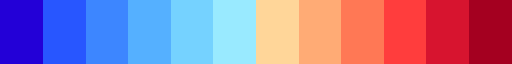

In [41]:
# 自定义色标
newcolors_1=[
       [0.14117647, 0.        , 0.84705882, 1.        ],
       [0.15686275, 0.34117647, 1.        , 1.        ],
       [0.23921569, 0.52941176, 1.        , 1.        ],
       [0.3372549 , 0.69019608, 1.        , 1.        ],
       [0.45882353, 0.82745098, 1.        , 1.        ],
       [0.6       , 0.91764706, 1.        , 1.        ],
       [1.        , 0.83921569, 0.6       , 1.        ],
       [1.        , 0.6745098 , 0.45882353, 1.        ],
       [1.        , 0.47058824, 0.3372549 , 1.        ],
       [1.        , 0.23921569, 0.23921569, 1.        ],
       [0.84705882, 0.08235294, 0.18431373, 1.        ],
       [0.64705882, 0.        , 0.12941176, 1.        ]
]
newcmap_1 = ListedColormap(newcolors_1[::1])
newcmap_1

In [58]:
# 设置字体
config = {
    "font.family": 'serif',
    "font.size": 12,
    "mathtext.fontset":'stix',
    'axes.unicode_minus': False 
         }
rcParams.update(config)

fig = plt.figure(figsize=(12,8))
proj = ccrs.PlateCarree(central_longitude=180)
leftlon, rightlon, lowerlat, upperlat = (10,240,-40,0)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

ax = fig.add_axes([0.1, 0.1, 0.8, 0.6],projection = proj)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face',facecolor=cfeature.COLORS['land'])
#ax.add_feature(land,facecolor='0.75')
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.set_xticks(np.arange(leftlon,rightlon+20,20), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lowerlat,upperlat+10,10), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
c1 = ax.pcolor(lon,lat, slope, zorder=0, vmin=-0.06, vmax=0.06, transform=ccrs.PlateCarree(), cmap=newcmap_1)
sig1 = ax.scatter(nx[area1], ny[area1],marker = '.',s=6, linewidths=1.3, c='purple',alpha=0.7,transform=ccrs.PlateCarree())

# colorbar
position=fig.add_axes([0.2, 0.22,  0.6, 0.025])
cmap_ticks = [-0.05, -0.04, -0.03, -0.02, -0.01, 0, 0.01, 0.02, 0.03, 0.04, 0.05]
fig.colorbar(c1,cax=position,ticks=cmap_ticks,orientation='horizontal',format='%.2f')

plt.savefig('TC生成频率.png', dpi=600, bbox_inches='tight',pad_inches = 0.2)
plt.show()

<Figure size 864x576 with 2 Axes>